# Advanced Machine Learning @ UDD
### Instructor: Visiting Professor Rossano Schifanella

## Linear models for classification

All linear models for classification learn a coefficient parameter ``coef_`` and an offset ``intercept_`` to make predictions using a linear combination of features:
```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_ > 0
```

As you can see, this is very similar to regression, only that a threshold at zero is applied.

Again, the difference between the linear models for classification what kind of regularization is put on ``coef_`` and ``intercept_``, but there are also minor differences in how the fit to the training set is measured (the so-called loss function).

The two most common models for linear classification are the linear SVM as implemented in LinearSVC and LogisticRegression.

A good intuition for regularization of linear classifiers is that with high regularization, it is enough if most of the points are classified correctly. But with less regularization, more importance is given to each individual data point.
This is illustrated using an linear SVM with different values of ``C`` below.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### Utility for visualizing the boundaries of a linear classifier (advanced - optional)

Just use the function if you are not interested in the visualization routine. 

In [18]:
# create a colormap for the points
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
print(cm_bright)

def plot_boundary(clf, X, y):
    
    # create a mesh of points that cover the full graph area
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # use the classifier to predict the class of each mesh point
    Z = clf.decision_function(X_grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))

    # plot the decision boundary
    norm = plt.cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
    plt.contourf(xx, yy, Z, 12, cmap=plt.cm.RdBu, alpha=.8, norm=norm)
    plt.colorbar()

    # plot the decision hyper-planes
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'],
            levels=[-1., 0, 1.])

    # plot the dataset points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    # set the graph limits
    plt.ylim(y_min, y_max)
    plt.xlim(x_min, x_max);

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X.shape

(569, 30)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train[:, :2], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Visualize the boundary

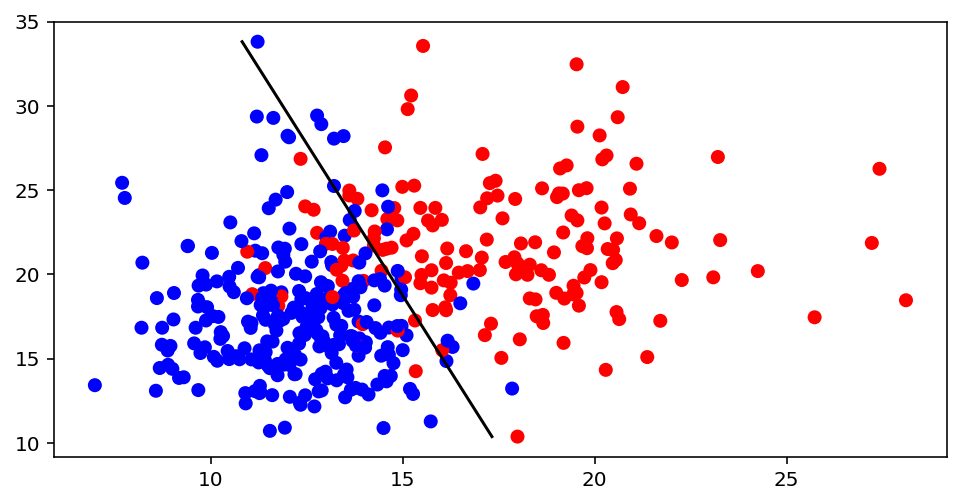

In [22]:
coef = logreg.coef_.ravel()
line = np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
line2 = - (line * coef[1]  + logreg.intercept_) / coef[0]

fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['#FF0000','#0000FF']))
ax.plot(line2, line, c='k')

### Alternative way to visualize the boundary with the custom function plot_boundary

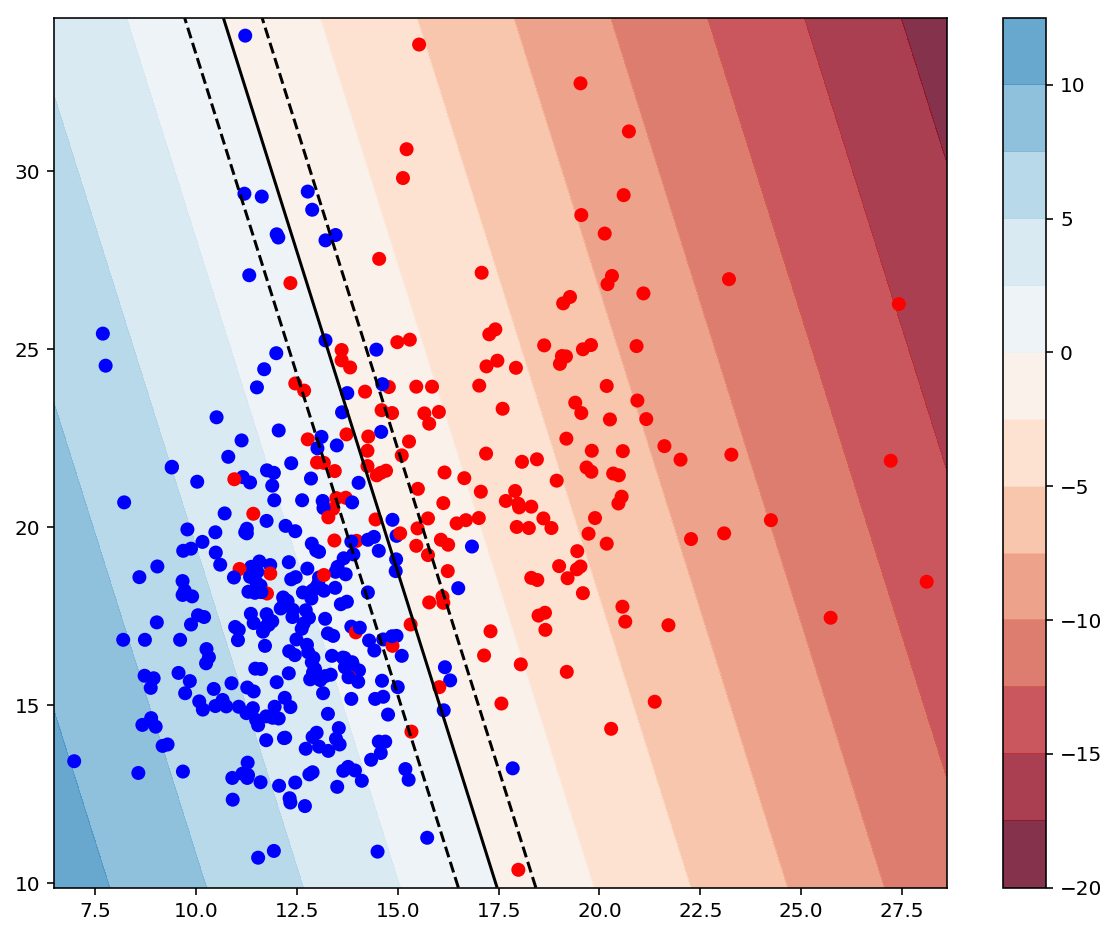

In [23]:
plot_boundary(logreg, X_train, y_train)

## Multi-class linear classification

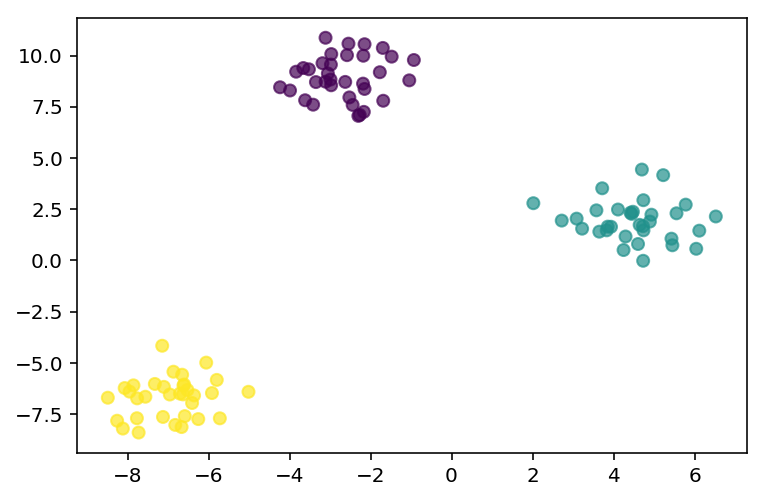

In [30]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X[:, 0], X[:, 1], c=plt.cm.viridis(y / 2.), alpha=0.7);

In [27]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


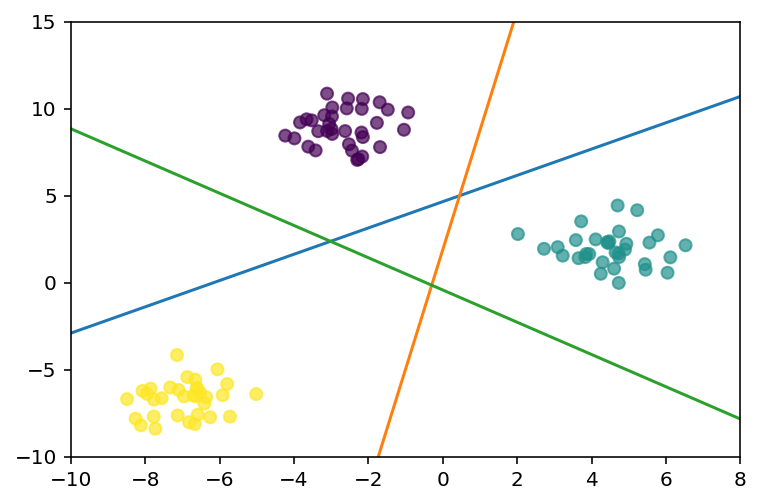

In [32]:
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(X[:, 0], X[:, 1], c=plt.cm.viridis(y / 2.), alpha=0.7);

line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    ax.plot(line, -(line * coef[0] + intercept) / coef[1])
ax.set_ylim(-10, 15)
ax.set_xlim(-10, 8);

Points are classified in a one-vs-rest fashion (aka one-vs-all), where we assign a test point to the class whose model has the highest confidence (in the SVM case, highest distance to the separating hyperplane) for the test point.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Use LogisticRegression to classify the digits data set, and grid-search the C parameter.
      </li>
      <li>
      How do you think the learning curves above change when you increase or decrease alpha?
Try changing the alpha parameter in ridge and lasso, and see if your intuition was correct.
      </li>
    </ul>
</div>

In [11]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# split the dataset, apply grid-search

In [12]:
# %load solutions/logreg_grid.py

In [13]:
# %load solutions/learning_curve_alpha.py